<a href="https://colab.research.google.com/github/meetgoel/ML-Projects/blob/main/SupervisedLearning/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Titanic Survival Prediction

The Titanic Survival Prediction project is a classic machine learning task that involves analyzing the survival patterns of passengers aboard the RMS Titanic. The dataset contains details such as passenger class, age, gender, fare, and other attributes that influence survival chances. The objective of this project is to build a predictive model using machine learning techniques to determine whether a passenger would survive or not based on these features. By applying data preprocessing, exploratory data analysis (EDA), feature engineering, and classification algorithms, we aim to gain insights into the factors affecting survival and evaluate the model’s performance using accuracy metrics.

Link for the Dataset:https://raw.githubusercontent.com/meetgoel/ML-Projects/refs/heads/main/Datasets/titanic.csv

Importing the Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/meetgoel/ML-Projects/refs/heads/main/Datasets/titanic.csv')
df.shape

(891, 12)

Splitting Data

In [91]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((712, 12), (179, 12))

Exploratory Data Analysis(EDA)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [6]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,140
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

In [8]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,12.994304,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,29.498846,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization

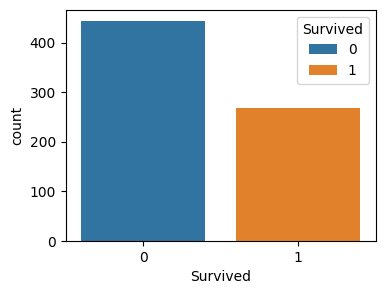

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived',data=df_train, hue="Survived")
plt.show()

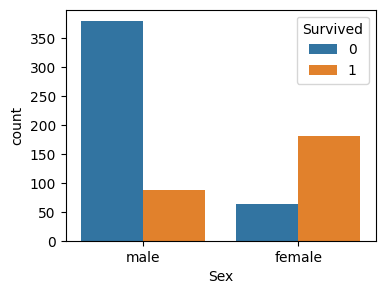

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x='Sex',data=df_train, hue="Survived")
plt.show()

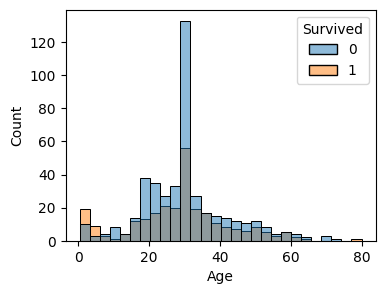

In [12]:
plt.figure(figsize=(4,3))
sns.histplot(x='Age',data=df_train, hue="Survived")
plt.show()

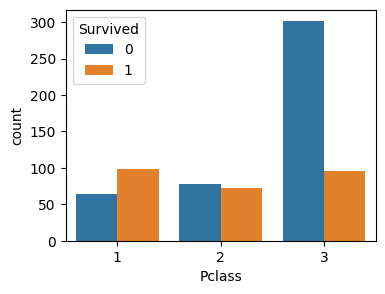

In [13]:
plt.figure(figsize=(4,3))
sns.countplot(x='Pclass',data=df_train, hue="Survived")
plt.show()

Outlier Detection

<Axes: xlabel='Fare'>

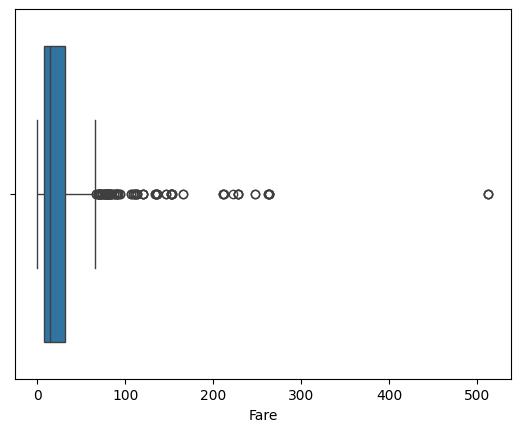

In [62]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Age'>

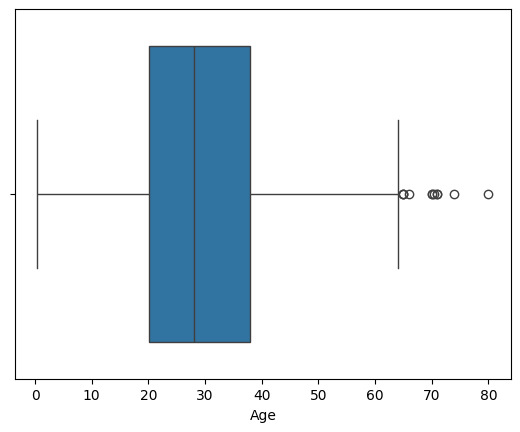

In [63]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='SibSp'>

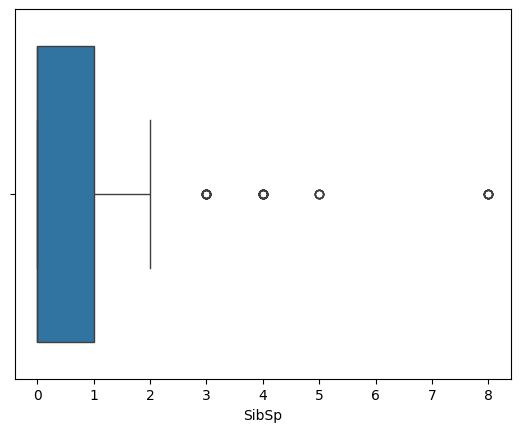

In [64]:
sns.boxplot(x=df['SibSp'])

Outlier Removal

In [76]:
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['Fare'] >= lower_bound) & (df_train['Fare'] <= upper_bound)]


<Axes: xlabel='Fare'>

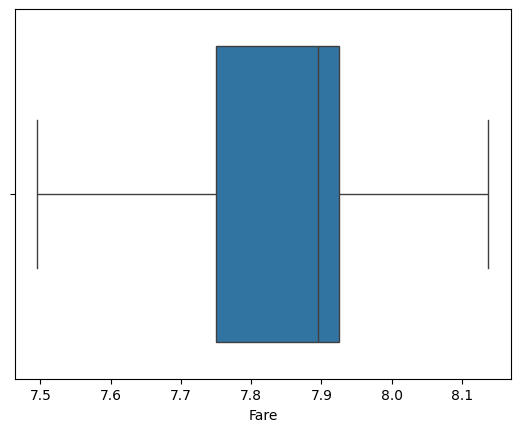

In [77]:
sns.boxplot(x=df_train['Fare'])

In [78]:
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['Age'] >= lower_bound) & (df_train['Age'] <= upper_bound)]

<Axes: xlabel='Age'>

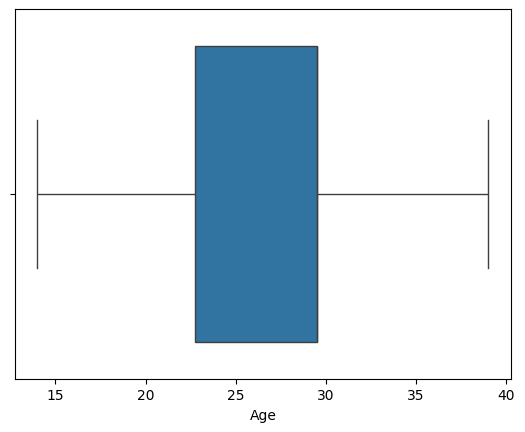

In [79]:
sns.boxplot(x=df_train['Age'])

In [94]:
Q1 = df_train['SibSp'].quantile(0.25)
Q3 = df_train['SibSp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[df_train['SibSp'] <= upper_bound]

<Axes: xlabel='SibSp'>

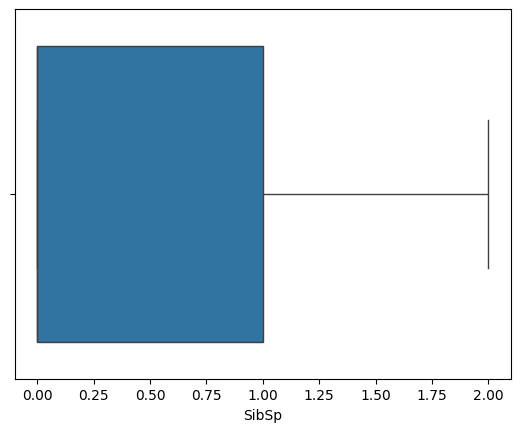

In [95]:
sns.boxplot(x=df_train['SibSp'])

Data Preprocessing

In [96]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
x_train = df_train.drop(["PassengerId","Survived", "Name", "Ticket", "Cabin"], axis=1)
x_test = df_test.drop(["PassengerId","Survived", "Name", "Ticket", "Cabin"], axis=1)
y_train = df_train["Survived"]
y_test = df_test["Survived"]

x_train.shape,y_train.shape, x_test.shape,  y_test.shape

((671, 7), (671,), (179, 7), (179,))

Feature Engineering

In [98]:
categorical_var = x_train.select_dtypes(include=['object']).columns
numerical_var = x_train.select_dtypes(include=['int64']).columns

ct = ColumnTransformer(
     [
        ("scaling",StandardScaler(),numerical_var),
        ("encoding",OneHotEncoder(handle_unknown='ignore'),categorical_var)

    ]
)
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

In [99]:
x_train.shape, x_test.shape

((671, 9), (179, 9))

Model Training

Model-1: Logistic Regression

In [100]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

Model-2: Support Vector Classifier

In [101]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

Model-3: DecisionTreeClassifier

In [102]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Model-4: KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Model-5: RandomForestClassifier

In [104]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

Model Prediction

Logistic Regression

In [105]:
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
lr_accuracy*100

78.77094972067039

Support Vector Classifier

In [106]:
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
svm_accuracy*100

79.88826815642457

Decision Tree Classifier

In [107]:
dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_accuracy*100

78.2122905027933

KNeighborsClassifier

In [108]:
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_accuracy*100

77.09497206703911

RandomForestClassifier

In [109]:
rfc_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_pred)
rfc_accuracy*100

79.88826815642457

Model Evaluation

Logistic Regression

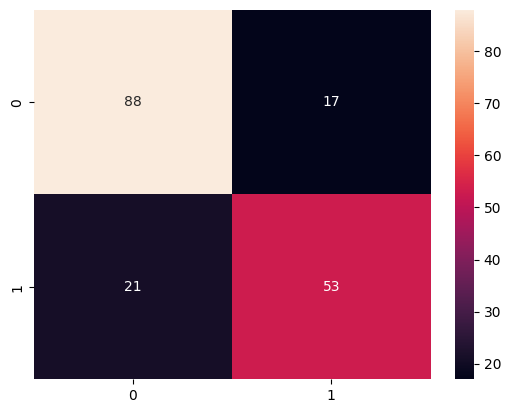

In [110]:
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm, annot=True)
plt.show()

Decision Tree Classifier

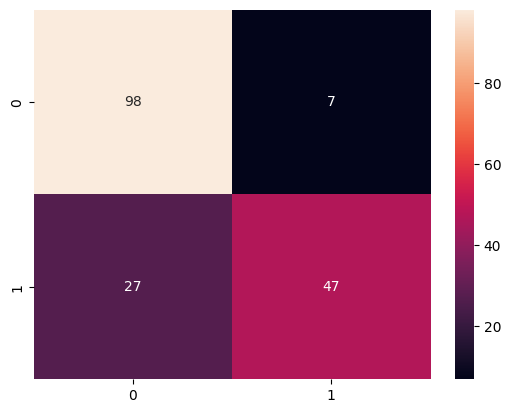

In [35]:
cm = confusion_matrix(y_test,dt_pred)
sns.heatmap(cm, annot=True)
plt.show()

KNeighborsClassifier

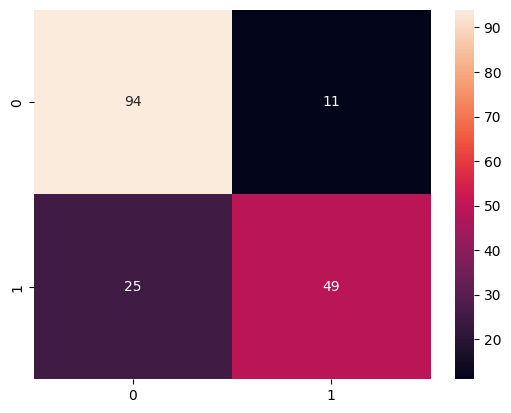

In [36]:
cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm, annot=True)
plt.show()

Support Vector Classifier

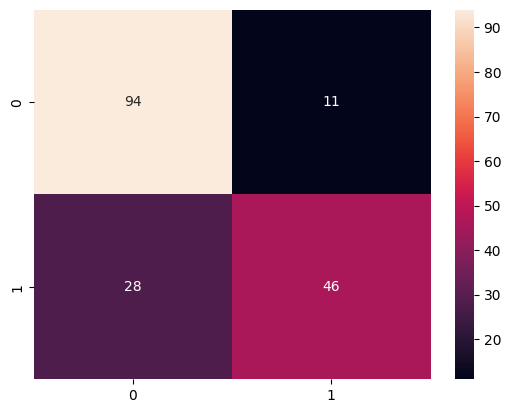

In [37]:
cm = confusion_matrix(y_test,svm_pred)
sns.heatmap(cm, annot=True)
plt.show()

Random Forest Classifier

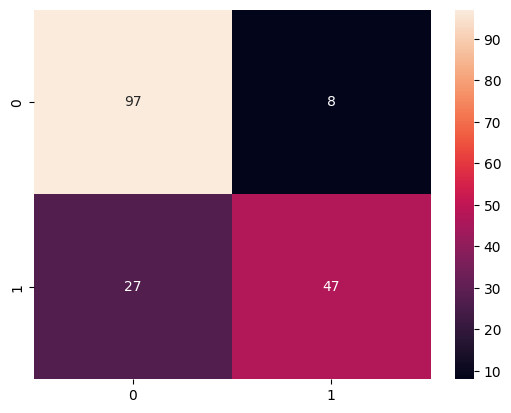

In [38]:
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm, annot=True)
plt.show()

Classification Report

In [39]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [40]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



In [111]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.75      0.66      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



In [112]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [113]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [114]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(79.73174366616989, 78.77094972067039)

In [115]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(83.75558867362146, 78.2122905027933)

In [116]:
knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100

(81.81818181818183, 77.09497206703911)

In [117]:
svm.score(x_train,y_train)*100,svm.score(x_test,y_test)*100

(81.66915052160954, 79.88826815642457)

In [118]:
rfc.score(x_train,y_train)*100,rfc.score(x_test,y_test)*100

(83.75558867362146, 79.88826815642457)

Model Optimization

LogisticRegression

In [119]:
grid_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=lr, param_grid=grid_params, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']})

In [120]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}

In [121]:
grid_search.best_score_*100

79.5787728026534

DecisionTreeClassifier

In [122]:
grid_params = {
     'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=dt, param_grid=grid_params, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [123]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [124]:
grid_search.best_score_*100

80.03648424543947

Support Vector Classifier

In [125]:
grid_params = {
     'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=svm, param_grid=grid_params, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'degree': [3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [126]:
grid_search.best_params_

{'C': 0.1, 'class_weight': None, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [127]:
grid_search.best_score_*100

79.8783858485351

KNeighborsClassifier

In [128]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}

grid_search = GridSearchCV(estimator=knn, param_grid=grid_params, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [129]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 7,
 'weights': 'uniform'}

In [130]:
grid_search.best_score_*100

79.73355444997236

RandomForestClassifier

In [145]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=grid_params, cv=5, n_jobs=1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [146]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [147]:
grid_search.best_score_*100

80.48313985627418

In [144]:
new_data = pd.DataFrame([[3,'female',16.0 , 0, 0, 7.7500, 'Q']],
                       columns=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

x_new = ct.transform(new_data)

prediction = lr.predict(x_new)
print(prediction)

[1]


Conclusion:

After evaluating different models, I found that RandomForestClassifier achieved the highest accuracy, making it the best-performing model. However, the DecisionTreeClassifier also provided a similar accuracy while being computationally more efficient. If computational resources are a concern, DecisionTreeClassifier can be a suitable alternative. However, for better generalization and robustness, RandomForestClassifier remains the preferred choice.